In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

# Exploratory Data Analysis

In [2]:
data = pd.read_csv("rides.csv")

In [3]:
print data.describe()
print data.shape

            bird_id  bird_model_id  start_odometer  end_odometer  \
count  50000.000000   50000.000000    50000.000000  50000.000000   
mean     247.838220       1.407460     1145.339987   1168.278776   
std      144.516275       0.491367      686.463628    686.633491   
min        0.000000       1.000000        0.000000      1.140000   
25%      122.000000       1.000000      558.895000    582.685000   
50%      248.000000       1.000000     1128.300000   1152.090000   
75%      373.000000       2.000000     1701.665000   1726.242500   
max      499.000000       2.000000     2967.740000   2985.710000   

       start_timestamp  end_timestamp      rider_id     rider_age  \
count     5.000000e+04   5.000000e+04  50000.000000  50000.000000   
mean      1.523064e+09   1.523070e+09     49.489340     42.333920   
std       2.864743e+05   2.865393e+05     28.872681     13.578946   
min       1.522542e+09   1.522545e+09      0.000000     18.000000   
25%       1.522820e+09   1.522826e+09     

Data has 50000 rides
Let's check for NA values

In [4]:
data.isnull().sum()

bird_id                       0
bird_model_id                 0
start_odometer                0
end_odometer                  0
start_timestamp               0
end_timestamp                 0
rider_id                      0
rider_age                     0
ride_rating                   0
ride_neighborhood             0
ride_triggered_maintenance    0
dtype: int64

Has 10 possible independent features and ride_triggered_maintenance as dependent variable.  
There are no N/A values, but let's be not assured. Because sometimes .csv has a problem of datatypes. For example if a column is a string column with "NA" as string it will be represented as string

In [5]:
data.dtypes

bird_id                         int64
bird_model_id                   int64
start_odometer                float64
end_odometer                  float64
start_timestamp                 int64
end_timestamp                   int64
rider_id                        int64
rider_age                       int64
ride_rating                     int64
ride_neighborhood              object
ride_triggered_maintenance       bool
dtype: object

No String type columns. But ride_neighborhood is an Object. We can analyze this further.

## 1. Univariate analysis

### 1.1 Distribution of Target

In [6]:
data.ride_triggered_maintenance.value_counts()

False    34584
True     15416
Name: ride_triggered_maintenance, dtype: int64

In [7]:
data.ride_triggered_maintenance.value_counts(normalize=True)

False    0.69168
True     0.30832
Name: ride_triggered_maintenance, dtype: float64

Emperical probability of maintenance is ~31%. This means by a random chance after every ride, scooter has a 31% chance that it will need a maintenance. However this will change depending upon distribution of independent variable, that we will investigate further

### Scooter Level Analysis

### 1.2 Rides made by scooter for different available models

In [8]:
data.bird_model_id.value_counts()

1    29627
2    20373
Name: bird_model_id, dtype: int64

In [9]:
model_1_rides,model_2_rides = data.bird_model_id.value_counts()

In [10]:
round((model_1_rides - model_2_rides)*100./model_2_rides,2)

45.42

Model 1 made 45% more rides than Model 2. May be because model 2 was launched after model 1 or model 1 has more scooters than model 1

### 1.3 Total scooters for different model versions

In [11]:
print "Scooters for Model 1: ",len(data[data.bird_model_id ==1].bird_id.unique()), 
print "Scooters for Model 2: ",len(data[data.bird_model_id ==2].bird_id.unique())

Scooters for Model 1:  296 Scooters for Model 2:  204


Model 1 has 31% more scooters than model 2. 

### 1.4 Distribution of rides distance travelled

In [12]:
data['distance_travelled'] = data['end_odometer'] - data['start_odometer']

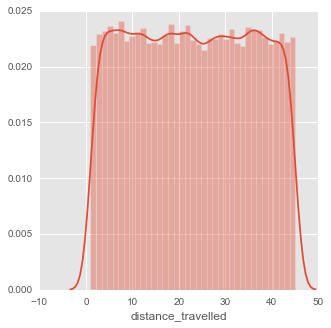

In [13]:
fig, axs = plt.subplots(1,1,figsize=(5,5))
sns.distplot(data.distance_travelled)

In [14]:
data.distance_travelled.mean(), data.distance_travelled.std(), data.distance_travelled.min(), data.distance_travelled.max()

(22.938788599999878, 12.708837559806716, 1.0, 45.0)

An average ride lasts for 22 units

### 1.5 Distribution of Elapsed time per ride

In [15]:
data['start_timestamp'] = pd.to_datetime(data['start_timestamp'], unit = 's')
data['end_timestamp'] = pd.to_datetime(data['end_timestamp'], unit = 's')

In [16]:
data.start_timestamp.min(), data.start_timestamp.max()

(Timestamp('2018-04-01 00:28:15'), Timestamp('2018-04-16 05:54:53'))

In [17]:
data['ride_time_interval_minutes'] = (data['end_timestamp'] - data['start_timestamp']).dt.total_seconds()/60.

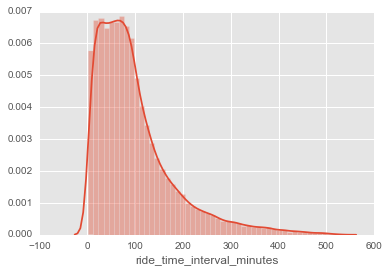

In [18]:
sns.distplot(data['ride_time_interval_minutes'])

In [19]:
np.mean(data['ride_time_interval_minutes']), np.median(data['ride_time_interval_minutes'])

(98.65224533333249, 78.299999999999997)

An average ride lasts 98 minutes. That means, on an average speed is 

### 1.6 Check for unique bird_id for different models

In [20]:
bird_model_1 = data[data.bird_model_id == 1].bird_id.unique()
bird_model_2 = data[data.bird_model_id == 2].bird_id.unique()
set(bird_model_1).intersection(set(bird_model_2))

set()

### 1.7 Total Mileage on the scooter

In [21]:
sorted_data = data.sort_values(by="start_timestamp")
sorted_data['mileage'] = sorted_data.groupby(['bird_id'])['distance_travelled'].apply(lambda x : x.cumsum())

In [22]:
sorted_data.sort_values(by=["bird_id","start_timestamp"])[['bird_id', 
                                       'distance_travelled',
                                      'mileage',
                                      'start_timestamp']].head()

,bird_id,distance_travelled,mileage,start_timestamp
161,0,19.20,19.20,2018-04-01 03:44:30
885,0,10.94,30.14,2018-04-01 05:28:59
2563,0,12.45,42.59,2018-04-01 06:39:24
2682,0,19.88,62.47,2018-04-01 08:48:18
3047,0,13.97,76.44,2018-04-01 11:30:43


In [23]:
sorted_data_max = sorted_data.groupby("bird_id").agg({'mileage' : 'max'}).reset_index()

2293.878859999998

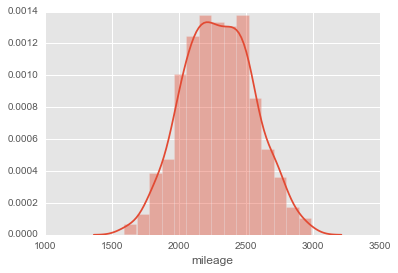

In [24]:
sns.distplot(sorted_data_max.mileage)
np.mean(sorted_data_max.mileage)

In [25]:
sorted_data_max[sorted_data_max.mileage == max(sorted_data_max.mileage)], sorted_data_max[sorted_data_max.mileage == min(sorted_data_max.mileage)]

(     bird_id  mileage
 497      497  2985.71,      bird_id  mileage
 156      156  1591.01)

Bird id 497 has highest mileage while 156 has lowest milleage

In [26]:
data = data.merge(sorted_data[['bird_id', 'start_timestamp', 'distance_travelled', 'mileage']], 
           on=['bird_id', 'start_timestamp', 'distance_travelled'])

### 1.7 Age of the scooter

In [27]:
age_agg = data.groupby('bird_id').agg({"start_timestamp" : "min"}).reset_index()

In [28]:
age_agg.columns = ["bird_id" , "birth"]

In [29]:
data = age_agg.merge(data, on="bird_id")
data['age_minutes'] = (data['start_timestamp'] - data['birth']).dt.total_seconds()/60.

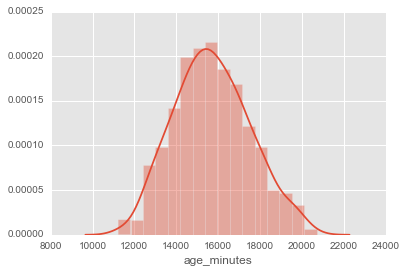

In [30]:
age_agg_max = data.groupby("bird_id").agg({"age_minutes" : "max"}).reset_index()
sns.distplot(age_agg_max['age_minutes'])

In [31]:
np.mean(age_agg_max['age_minutes']/(60*24))

10.91470229166666

Average age of scooter is 11 days.

# 1.8 Rating distribution

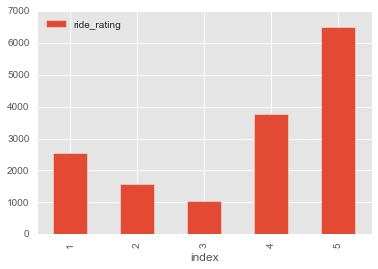

In [32]:
data[data.ride_triggered_maintenance==True].ride_rating.value_counts().reset_index().sort_values(by="index").plot(kind='bar',y='ride_rating', x="index")

Most ratings are 5.

## 2. Multivariate Analysis

### 2.1 Maintenance trigger rate by week day

As there are more riders during weekends, we may find some correlations for triggered maintenance and day of the week

In [33]:
week_day = ['Monday', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
data['week_day'] = map(lambda x : week_day[x], data['start_timestamp'].dt.dayofweek)

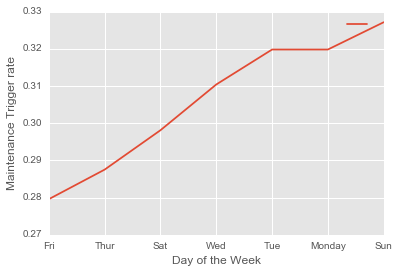

In [34]:
data.groupby('week_day').agg({"ride_triggered_maintenance" : "mean"}).sort_values(by="ride_triggered_maintenance").plot()
plt.legend([""])
plt.xlabel("Day of the Week")
plt.ylabel("Maintenance Trigger rate")

seems sunday has ~33% probability of response event occuring while friday has 28%

### 2.2 Maintenance Trigger rate by rider rating

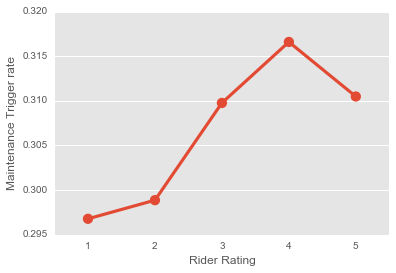

In [35]:
grouped_rid = data.groupby('ride_rating').agg({"ride_triggered_maintenance" : "mean"})\
                .reset_index().sort_values(by="ride_triggered_maintenance")
sns.pointplot(grouped_rid.ride_rating.tolist(), grouped_rid.ride_triggered_maintenance.tolist())
plt.xlabel("Rider Rating")
plt.ylabel("Maintenance Trigger rate")

### 2.3 Mileage before ride triggered maintenace

In [36]:
data['mileage_before_ride'] = data['mileage'] - data['distance_travelled']

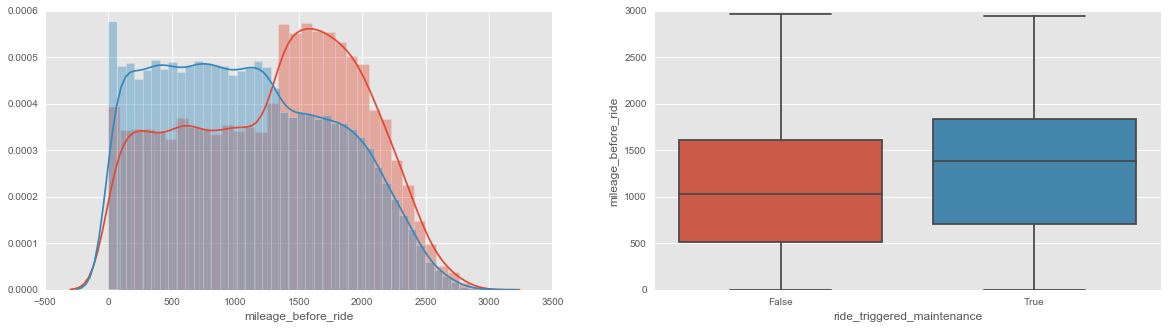

In [37]:
fig, axs = plt.subplots(1,2,figsize=(20,5))
sns.distplot(data[data.ride_triggered_maintenance==True].mileage_before_ride, ax=axs[0])
sns.distplot(data[data.ride_triggered_maintenance==False].mileage_before_ride,  ax=axs[0])
plt.legend(["Mileage for triggered events " ,"Mileage for non triggered events"])
sns.boxplot(data.ride_triggered_maintenance,data.mileage_before_ride, ax=axs[1])

Maintenance trigger happens at ~1293 units of total distance convered by a scooter

### 2.4 Age before ride triggered maintenance

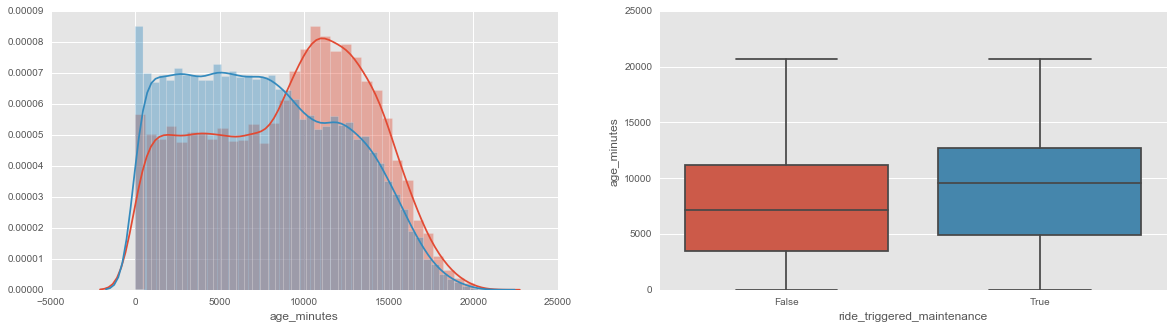

In [38]:
fig, axs = plt.subplots(1,2,figsize=(20,5))
sns.distplot(data[data.ride_triggered_maintenance==True].age_minutes, ax=axs[0])
sns.distplot(data[data.ride_triggered_maintenance==False].age_minutes,  ax=axs[0])
plt.legend(["Mileage for triggered events " ,"Mileage for non triggered events"])
sns.boxplot(data.ride_triggered_maintenance,data.age_minutes, ax=axs[1])

Correlation:  [[ 1.          0.99319958]
 [ 0.99319958  1.        ]]


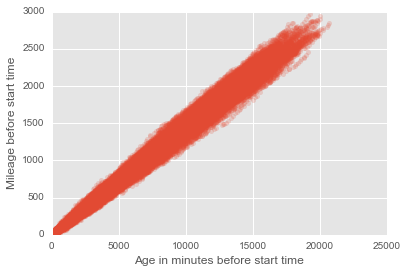

In [39]:
plt.plot(data.age_minutes, data.mileage_before_ride,'.', markersize=10, alpha=0.2)
print "Correlation: ",np.corrcoef(data.age_minutes, data.mileage_before_ride)
plt.xlabel("Age in minutes before start time")
plt.ylabel("Mileage before start time")

Seems like Age of the bike is perfectly correlated to mileage on the bike. We can exclude either of those feature during modelling

### 2.5 Trigger rate by region

In [40]:
region = data[['ride_neighborhood', 'ride_triggered_maintenance','start_timestamp', 'bird_id', 'distance_travelled']].reset_index()

In [41]:
region = region.pivot_table(index=['bird_id', 'start_timestamp'], columns='ride_neighborhood', values='distance_travelled').reset_index()

In [42]:
region = region.fillna(0)

In [43]:
region_name = [i for i in data.ride_neighborhood.unique()]
agg_region = region.groupby('bird_id').cumsum().fillna(0)[region_name]
diff_agg_region = (agg_region - region[region_name]).fillna(0)

In [44]:
rider = pd.concat([diff_agg_region, data['ride_triggered_maintenance']],axis=1)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression().fit(rider[region_name], rider.ride_triggered_maintenance)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

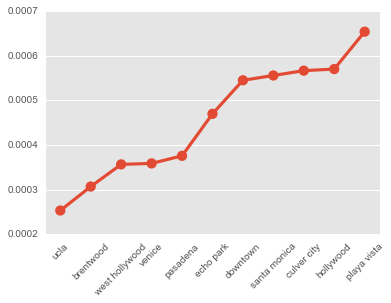

In [47]:
region_coef = sorted(zip(region_name, model.coef_[0]),key=lambda x: x[1])
g = sns.pointplot(zip(*region_coef)[0], zip(*region_coef)[1])
plt.xticks(rotation=45)

Assuming all features have equal distribution, ridding scooter in playa vista increases probability of response event. Region can also be consider for modelling 

### 2.6 Rider age

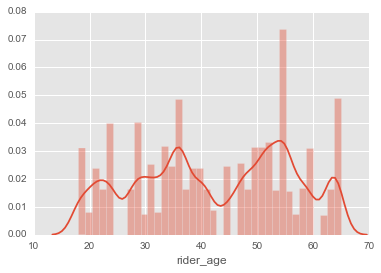

In [48]:
sns.distplot(data.rider_age)

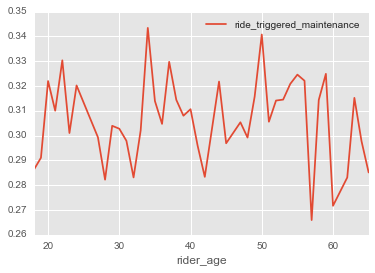

In [49]:
data.groupby("rider_age").agg({"ride_triggered_maintenance" : "mean"}).plot()

### 2.7 Model 

In [50]:
data.groupby("bird_model_id").agg({"ride_triggered_maintenance" : "mean"})

,ride_triggered_maintenance
bird_model_id,
1,0.309076
2,0.307220


May be bird model version has equal probability of reponse event and might not be significant

# Feature Engineering

Looking at above analysis, we can consider following features for base model

1. Mileage
2. Rider Age
3. Ride Neighborhood
4. Ride Rating
5. Week day
6. Scooter Age
7. Bird model id
8. Rider Id
9. Bird Id
10. Distance travelled
11. Log Distance Travelled
12. Start Hr
13. End Hr

In [51]:
data.columns.tolist()

['bird_id',
 'birth',
 'bird_model_id',
 'start_odometer',
 'end_odometer',
 'start_timestamp',
 'end_timestamp',
 'rider_id',
 'rider_age',
 'ride_rating',
 'ride_neighborhood',
 'ride_triggered_maintenance',
 'distance_travelled',
 'ride_time_interval_minutes',
 'mileage',
 'age_minutes',
 'week_day',
 'mileage_before_ride']

In [52]:
data['start_hr'] = data.start_timestamp.dt.hour
data['end_hr'] = data.end_timestamp.dt.hour

In [53]:
data['log_distance_travelled'] = np.log(data.distance_travelled)

In [54]:
model_data = data[['rider_age', 
                   'mileage_before_ride', 
                   'age_minutes',
                   'week_day',
                  'ride_rating',
                  'ride_neighborhood',
                   'ride_triggered_maintenance',
                   'bird_model_id',
                   'start_hr',
                   'end_hr',
                   'distance_travelled',
                   'log_distance_travelled',
                   'bird_id',
                   'rider_id'
                  ]]

Following features needs one hot encoding
1. week_day
2. ride_rating
3. ride_neighborhood

In [55]:
week_day_one = pd.get_dummies(data['week_day'])
ride_rating_one = pd.get_dummies(data['ride_rating'])
ride_neighborhood_one = pd.get_dummies(data['ride_neighborhood'])

One hot encoding enforces perfect multicolinearity. Hence it's good to drop one colume

In [56]:
del week_day_one["Monday"]

In [57]:
ride_rating_one.columns = map(lambda x : str(x), ride_rating_one.columns.tolist())
del ride_rating_one["1"]

In [58]:
del ride_neighborhood_one['brentwood']

In [59]:
model_data = pd.concat([model_data[['rider_age', 'mileage_before_ride', 
                                    'age_minutes','ride_triggered_maintenance',
                                    'bird_model_id','start_hr','end_hr',
                                    'distance_travelled','log_distance_travelled',
                                    'bird_id','rider_id']], 
           week_day_one, 
           ride_rating_one, 
           ride_neighborhood_one],axis=1)

In [60]:
feature_list = ['rider_age', 'mileage_before_ride', 'age_minutes','bird_model_id','start_hr','end_hr',
                'distance_travelled','log_distance_travelled','bird_id','rider_id']
feature_list = feature_list+week_day_one.columns.tolist()+ride_rating_one.columns.tolist()+ride_neighborhood_one.columns.tolist()

# 3 Modelling

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
train, test = train_test_split(model_data, test_size=0.3, stratify = model_data.ride_triggered_maintenance)

In [63]:
train_x, test_x = train[feature_list], test[feature_list]

In [64]:
train_y , test_y = train.ride_triggered_maintenance, test.ride_triggered_maintenance

In [65]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score, roc_auc_score, precision_recall_curve,confusion_matrix)
from sklearn.calibration import calibration_curve


In [66]:
feature_pipeline = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                ('normalize', StandardScaler(with_mean=True, with_std=True))])

In [67]:
feature_pipeline.fit(train_x)

Pipeline(steps=[('MinMaxScaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('normalize', StandardScaler(copy=True, with_mean=True, with_std=True))])

In [68]:
feature_train_x = feature_pipeline.transform(train_x)
feature_test_x = feature_pipeline.transform(test_x)

In [69]:
corr = train_x.corr()

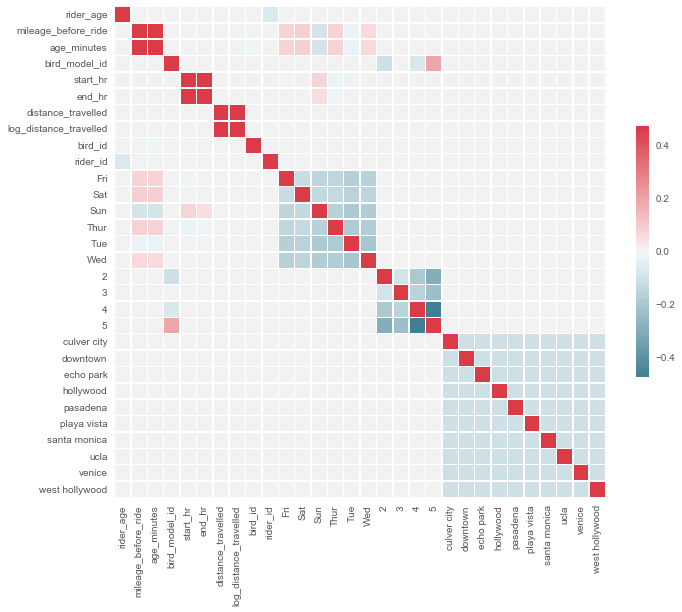

In [70]:
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### 3.1 Base Model

Logistic Regression is a linear model, which assumes that independeent variables are linearly correlated to dependent variable  
As it is a imbalance class problem, we will use following evaluation critieria
Precision, Recall, F1 score, AUROC

In [71]:
base_model = LogisticRegression(class_weight='balanced', penalty='l1',C=20, max_iter=200)
base_model.fit(feature_train_x, train_y)
train_y_pred = base_model.predict(feature_train_x)
test_y_pred = base_model.predict(feature_test_x)
train_y_pred_proba = base_model.predict_proba(feature_train_x)
test_y_pred_proba = base_model.predict_proba(feature_test_x)

In [72]:
def evaluate(y, y_hat, y_hat_proba):
    print("\tPrecision: %1.3f" % precision_score(y, y_hat))
    print("\tRecall: %1.3f" % recall_score(y, y_hat))
    print("\tF1: %1.3f\n" % f1_score(y, y_hat))
    print("\tAUROC: %1.3f\n" % roc_auc_score(y, y_hat_proba))
    prec, recall,_ = precision_recall_curve(y, y_hat)
    fig, axs = plt.subplots(1,2,figsize=(10,5))
    axs[0].step(recall, prec, color='b', alpha=0.2,
         where='post')
    fraction_of_positives, mean_predicted_value = calibration_curve(y, y_hat_proba,n_bins=10)
    axs[1].plot(mean_predicted_value, fraction_of_positives)
    axs[1].plot([0,1],[0,1])
    axs[1].set_xlabel("Emperical trigger rate")
    axs[1].set_ylabel("Predicted trigger rate")
    print confusion_matrix(y, y_hat)

	Precision: 0.391
	Recall: 0.538
	F1: 0.453

	AUROC: 0.596

[[15185  9024]
 [ 4986  5805]]


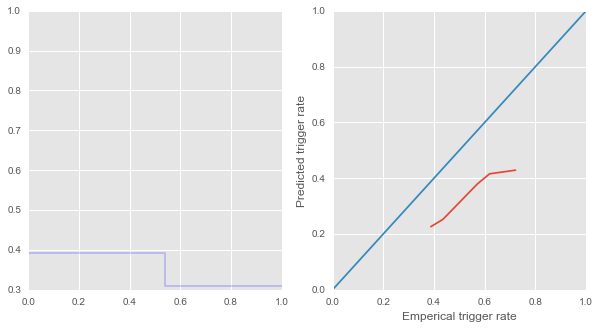

In [73]:
evaluate(train_y, train_y_pred, train_y_pred_proba[:,1])

	Precision: 0.390
	Recall: 0.546
	F1: 0.455

	AUROC: 0.585

[[6432 3943]
 [2101 2524]]


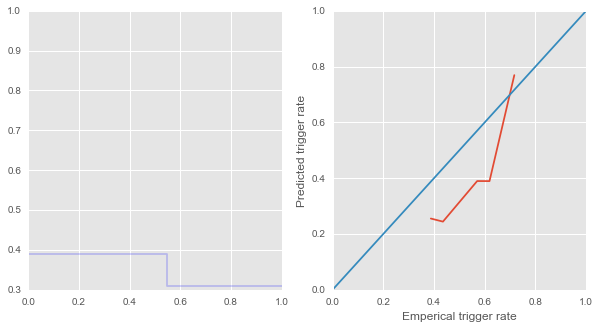

In [74]:
evaluate(test_y, test_y_pred,test_y_pred_proba[:,1])

In [75]:
sorted(zip(feature_list,base_model.coef_[0]),key=lambda x: x[1], reverse=True)

[('mileage_before_ride', 0.31095135435526011),
 ('4', 0.042793273453403814),
 ('age_minutes', 0.029345374919050267),
 ('distance_travelled', 0.026328216503372623),
 ('5', 0.023199022878546523),
 ('bird_id', 0.019029135602004945),
 ('rider_age', 0.014235476162795989),
 ('start_hr', 0.012459041093632038),
 ('3', 0.009613812364471213),
 ('rider_id', 0.0057983458281623415),
 ('2', -0.0069280682156284482),
 ('culver city', -0.0072986911953076472),
 ('Sun', -0.0081599442935493018),
 ('ucla', -0.014248132687766819),
 ('venice', -0.016783413514976218),
 ('bird_model_id', -0.018277942928835857),
 ('west hollywood', -0.019432080061865645),
 ('end_hr', -0.023004360991157002),
 ('hollywood', -0.026133429239253759),
 ('log_distance_travelled', -0.0285569971785656),
 ('pasadena', -0.031237466805416121),
 ('santa monica', -0.033234355471561443),
 ('Tue', -0.043775053764795915),
 ('playa vista', -0.045314853277660182),
 ('echo park', -0.046836481513282215),
 ('downtown', -0.047285429831613934),
 ('Sat

Base model is better than random with mileage_before_ride being most important variable.  
Looking at calibration curve, model underpredicts probabilities

### 3.2 Random Forest

Random Forest and decision trees are not susceptible to feature scaling. But we will still process with scaled features. Random forest has only 1 assumption that sampling is representative meaning, every bootstrap can be represented by OOB samples

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [77]:
params = {
    'n_estimators' : [100,400],
    'max_features' : [0.8, 'sqrt'],
    'min_samples_split' : [10,25,100],
    'min_samples_leaf' : [1,5,20,100]
}
rf_model = GridSearchCV(RandomForestClassifier(n_jobs = -1, 
                                               class_weight = 'balanced',oob_score=True,bootstrap=True),
                                            params, cv=10, scoring='roc_auc')
rf_model.fit(feature_train_x, train_y)

KeyboardInterrupt: 

In [ ]:
rf_model.best_params_

In [ ]:
rf_best_model = RandomForestClassifier(n_jobs = -1, class_weight = 'balanced',
                                       oob_score=True,bootstrap=True, **rf_model.best_params_)

rf_best_model.fit(feature_train_x, train_y)
train_y_pred = rf_best_model.predict(feature_train_x)
test_y_pred = rf_best_model.predict(feature_test_x)

train_y_pred_proba = rf_best_model.predict_proba(feature_train_x)
test_y_pred_proba = rf_best_model.predict_proba(feature_test_x)

In [ ]:
evaluate(train_y, train_y_pred, train_y_pred_proba[:,1])

In [ ]:
evaluate(test_y, test_y_pred, test_y_pred_proba[:,1])

In [ ]:
sorted(zip(feature_list, rf_best_model.feature_importances_), key=lambda x : x[1], reverse=True)

Random Forest probabilities are often not very calibrated. Hence this can be stabilized with fitting logistic regression on them. But atleast it performs better than base model.  
Mileage before ride is most important variable followed by age of the scooter in minutes. However these variables are correlated hence importance can change on every iteration of model.

### 3.4 Neural Network

Logistic regression being a linear classfier, we can use Neural network to induce non-lineartiy. 
Neural Network also follows same assumptions of logistic regression as Logistic regression is just a 1 node neural network. Neural Network requires normalized inputs. 

In [78]:
import h2o

In [79]:
h2o.init(max_mem_size = 16)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_101"; Java(TM) SE Runtime Environment (build 1.8.0_101-b13); Java HotSpot(TM) 64-Bit Server VM (build 25.101-b13, mixed mode)
  Starting server from /Users/dwipam/anaconda2/h2o_jar/h2o.jar
  Ice root: /var/folders/7v/112h889n7296zw07cjj471hr0000gn/T/tmp1DVnwr
  JVM stdout: /var/folders/7v/112h889n7296zw07cjj471hr0000gn/T/tmp1DVnwr/h2o_dwipam_started_from_python.out
  JVM stderr: /var/folders/7v/112h889n7296zw07cjj471hr0000gn/T/tmp1DVnwr/h2o_dwipam_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster version:,3.10.0.8
H2O cluster version age:,"2 years, 9 months and 11 days !!!"
H2O cluster name:,H2O_from_python_dwipam_5a17h1
H2O cluster total nodes:,1
H2O cluster free memory:,14.22 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [80]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

In [81]:
train_x_h2o = h2o.H2OFrame(feature_train_x)
train_y_h2o = h2o.H2OFrame(pd.DataFrame(train_y))
test_x_h2o = h2o.H2OFrame(feature_test_x)
test_y_h2o = h2o.H2OFrame(pd.DataFrame(test_y))

Parse progress: |█████████████████████████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████████████████████████| 100%


In [82]:
features = train_x_h2o.columns
target = train_y_h2o.columns[0]

In [83]:
train_h2o = train_x_h2o.cbind(train_y_h2o)
test_h2o = test_x_h2o.cbind(test_y_h2o)

In [87]:
activation_opt = ["Rectifier", "RectifierWithDropout", "Maxout", "MaxoutWithDropout"]
l1_opt = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1]
l2_opt = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1]
hidden = [[10,10,10,10],[50,20,10],[100,30]]
epochs = [100,300,400,500,750]
dl_params = {'activation': activation_opt, 'l1': l1_opt, 'l2': l2_opt, 'hidden' : hidden, 'epochs' : epochs}
search_criteria = {'strategy': 'RandomDiscrete'}
dl_grid = H2OGridSearch(model=H2ODeepLearningEstimator,
                        grid_id='dl_grid1',
                        hyper_params=dl_params,
                        search_criteria=search_criteria)
dl_grid.train(x=features, y=target,
              training_frame=train_h2o, 
              validation_frame=test_h2o,
             balance_classes= True,
             stopping_metric = "AUC")

deeplearning Grid Build progress: |███████████████████████████████████████████████████████████| 100%

ValueError: I/O operation on closed file

In [ ]:
dl_gridperf = dl_grid.get_grid(sort_by='auc', decreasing=True)
best_dl_model = dl_gridperf.models[0]

In [ ]:
best_dl_model.model_performance(test_h2o)

In [ ]:
train_y_pred = best_dl_model.predict(train_h2o).as_data_frame(use_pandas=True)
test_y_pred = best_dl_model.predict(test_h2o).as_data_frame(use_pandas=True)

In [ ]:
m_, p_ = calibration_curve(test_y,test_y_pred["True"],n_bins=30)
plt.plot(m_,p_)
plt.plot([0,.6],[0,.6])

Looking at the calibration curve and AUROC NN out performs RF. However looking at the confusion matrix it's more likely to assign class labels to 1. We can change the threshold such that we maximize Precision, as we can see Max Recall is 1.

### 3.3 GBM

In [ ]:
# GBM hyperparameters
gbm_params2 = {'learn_rate': [i * 0.01 for i in range(1, 11)], 
                'max_depth': list(range(2, 11)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)],
              'ntrees':[10,50,100,200,500]}

# Search criteria
search_criteria2 = {'strategy': 'RandomDiscrete'}
gbm_grid2 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid2',
                          hyper_params=gbm_params2,
                          search_criteria=search_criteria2)
gbm_grid2.train(x=features, y=target,
              training_frame=train_h2o, 
              validation_frame=test_h2o,
             balance_classes = True,
             stopping_metric = "AUC")

In [ ]:
gbm_gridperf = gbm_grid2.get_grid(sort_by='auc', decreasing=True)
best_gbm_model = gbm_gridperf.models[0]

# 4 Further Improvements

- We can further fine tune hyper parameters of the model.  
- This data is 15 days data. Adding data from previous year would also give some form of seasonality over month/season.  
- We can also include rider attributes.
- We can assign every ride with its previous n-1 rider information.
- We can add specific features of last maintenance.
- We can weather data
